In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
import re

# Load The Data

In [35]:
df_not_filtered = pd.read_json('Data/News_Category_Dataset_v3.json', lines=True)

In [36]:
df_not_filtered

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28


In [37]:
column_values = df_not_filtered['category'].tolist()
column_values

['U.S. NEWS',
 'U.S. NEWS',
 'COMEDY',
 'PARENTING',
 'U.S. NEWS',
 'U.S. NEWS',
 'U.S. NEWS',
 'WORLD NEWS',
 'CULTURE & ARTS',
 'WORLD NEWS',
 'WORLD NEWS',
 'WORLD NEWS',
 'WORLD NEWS',
 'TECH',
 'U.S. NEWS',
 'WORLD NEWS',
 'CULTURE & ARTS',
 'SPORTS',
 'WORLD NEWS',
 'WORLD NEWS',
 'ENTERTAINMENT',
 'POLITICS',
 'WORLD NEWS',
 'U.S. NEWS',
 'POLITICS',
 'U.S. NEWS',
 'SPORTS',
 'WORLD NEWS',
 'ENTERTAINMENT',
 'WEIRD NEWS',
 'POLITICS',
 'U.S. NEWS',
 'ENVIRONMENT',
 'WORLD NEWS',
 'ENVIRONMENT',
 'ENVIRONMENT',
 'WORLD NEWS',
 'ENVIRONMENT',
 'WEIRD NEWS',
 'ENTERTAINMENT',
 'POLITICS',
 'U.S. NEWS',
 'U.S. NEWS',
 'ENTERTAINMENT',
 'POLITICS',
 'CULTURE & ARTS',
 'U.S. NEWS',
 'ENTERTAINMENT',
 'ENTERTAINMENT',
 'ENTERTAINMENT',
 'ENTERTAINMENT',
 'WORLD NEWS',
 'ENTERTAINMENT',
 'U.S. NEWS',
 'POLITICS',
 'TECH',
 'U.S. NEWS',
 'ENTERTAINMENT',
 'U.S. NEWS',
 'POLITICS',
 'POLITICS',
 'SPORTS',
 'SPORTS',
 'POLITICS',
 'POLITICS',
 'CULTURE & ARTS',
 'CULTURE & ARTS',
 'SPORTS'

# Filter categories

In [38]:
df = df_not_filtered[df_not_filtered['category'].isin(
    ['POLITICS', 'TRAVEL', 'SPORTS', 'HOME & LIVING']
)]

In [39]:
column_values = df['category'].tolist()
column_values

['SPORTS',
 'POLITICS',
 'POLITICS',
 'SPORTS',
 'POLITICS',
 'POLITICS',
 'POLITICS',
 'POLITICS',
 'POLITICS',
 'POLITICS',
 'SPORTS',
 'SPORTS',
 'POLITICS',
 'POLITICS',
 'SPORTS',
 'POLITICS',
 'POLITICS',
 'POLITICS',
 'POLITICS',
 'POLITICS',
 'SPORTS',
 'POLITICS',
 'SPORTS',
 'POLITICS',
 'POLITICS',
 'POLITICS',
 'POLITICS',
 'POLITICS',
 'POLITICS',
 'POLITICS',
 'POLITICS',
 'POLITICS',
 'POLITICS',
 'POLITICS',
 'POLITICS',
 'POLITICS',
 'POLITICS',
 'POLITICS',
 'POLITICS',
 'POLITICS',
 'POLITICS',
 'POLITICS',
 'POLITICS',
 'POLITICS',
 'POLITICS',
 'POLITICS',
 'POLITICS',
 'POLITICS',
 'POLITICS',
 'POLITICS',
 'POLITICS',
 'POLITICS',
 'POLITICS',
 'POLITICS',
 'POLITICS',
 'POLITICS',
 'POLITICS',
 'SPORTS',
 'POLITICS',
 'SPORTS',
 'SPORTS',
 'POLITICS',
 'POLITICS',
 'POLITICS',
 'SPORTS',
 'SPORTS',
 'POLITICS',
 'POLITICS',
 'SPORTS',
 'SPORTS',
 'POLITICS',
 'POLITICS',
 'POLITICS',
 'POLITICS',
 'POLITICS',
 'SPORTS',
 'SPORTS',
 'POLITICS',
 'POLITICS',
 'POL

In [40]:
df.shape

(54899, 6)

# Balance

In [41]:
df_balanced = df.groupby('category').apply(
    lambda x: x.sample(n=1000, random_state=42)
).reset_index(drop=True)

C:\Users\osamasaid\AppData\Local\Temp\ipykernel_43992\2387008822.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df.groupby('category').apply(


In [42]:
df_balanced

,link,headline,category,short_description,authors,date
0,https://www.huffingtonpost.com/entry/busiest-s...,"Busiest Shipping Day Of The Year Is Today, Ann...",HOME & LIVING,"For many people, the most hectic shopping day ...",,2013-12-16
1,https://www.huffpost.com/entry/aziz-ansari-rig...,What To Watch On Netflix That’s New This Week ...,HOME & LIVING,"The comedy special ""Aziz Ansari: Right Now"" de...",Todd Van Luling,2019-07-13
2,https://www.huffingtonpost.com/entry/repurposi...,Repurposing Idea Shows You How To Organize Hai...,HOME & LIVING,"Yep, it really can.",Michelle Manetti,2013-03-19
3,https://www.huffingtonpost.com/entry/horse-lam...,Company Buys $8000 Horse Lamp By Front Design ...,HOME & LIVING,"You've got to be kidding us, it's a horse-shap...",,2013-01-19
4,https://www.huffingtonpost.com/entry/renovate-...,Renovate for Rent,HOME & LIVING,Life is expensive! Use your talents to help de...,"Brian Kelsey, Contributor\nTV Personality, Ren...",2014-04-07
...,...,...,...,...,...,...
3995,https://www.huffingtonpost.com/entry/creepy-ro...,The 7 Most Mysterious Stone-Carved Faces That ...,TRAVEL,"Leshan Giant Buddha, China An old Chinese monk...",Suzy Strutner,2013-10-25
3996,https://www.huffingtonpost.com/entry/tips-for-...,Tips for a Stress-Free Family Summer Vacation,TRAVEL,If you're one of the many families getting rea...,"Dr. Gail Gross, Contributor\nHuman Behavior, P...",2013-05-24
3997,https://www.huffingtonpost.com/entry/the-busie...,These Are The Busiest Flight Routes In The World,TRAVEL,,Kate Auletta,2014-08-07
3998,https://www.huffpost.com/entry/travel-facebook...,"This Is The Best, Most Underrated Travel Resource",TRAVEL,Groups like Girls LOVE Travel and the Solo Fem...,Brittany Wong,2019-09-27


In [43]:
df_balanced['category'].unique()

array(['HOME & LIVING', 'POLITICS', 'SPORTS', 'TRAVEL'], dtype=object)

In [44]:
df = df_balanced[['short_description', 'category']].copy()
df

,short_description,category
0,"For many people, the most hectic shopping day ...",HOME & LIVING
1,"The comedy special ""Aziz Ansari: Right Now"" de...",HOME & LIVING
2,"Yep, it really can.",HOME & LIVING
3,"You've got to be kidding us, it's a horse-shap...",HOME & LIVING
4,Life is expensive! Use your talents to help de...,HOME & LIVING
...,...,...
3995,"Leshan Giant Buddha, China An old Chinese monk...",TRAVEL
3996,If you're one of the many families getting rea...,TRAVEL
3997,,TRAVEL
3998,Groups like Girls LOVE Travel and the Solo Fem...,TRAVEL


# Preprocessing

**Lowercase:**

In [45]:
df['short_description'] = df['short_description'].str.lower()

**Remove punctuation:**

In [46]:
df['short_description'] = df['short_description'].apply(lambda x: re.sub(r'[^a-z\s]', ' ', x))

**Remove stopwords:**

In [47]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Split → remove stopwords → join back

df['short_description'] = df['short_description'].apply(
    lambda x: " ".join([word for word in x.split() if word not in stop_words])
)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\osamasaid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
df

,short_description,category
0,many people hectic shopping day year comes day...,HOME & LIVING
1,comedy special aziz ansari right debuts,HOME & LIVING
2,yep really,HOME & LIVING
3,got kidding us horse shaped lamp,HOME & LIVING
4,life expensive use talents help defer cost,HOME & LIVING
...,...,...
3995,leshan giant buddha china old chinese monk tho...,TRAVEL
3996,one many families getting ready get away summe...,TRAVEL
3997,,TRAVEL
3998,groups like girls love travel solo female trav...,TRAVEL


# Split (80/20)

In [49]:
from sklearn.model_selection import train_test_split

x = df['short_description'] 
y = df['category']

X_train, X_test, y_train, y_test = train_test_split(
    x, y, 
    test_size=0.2,        # 20% test
    stratify=y,           # keep same category proportions
    random_state=42       # reproducibility
)

# Generate word clouds from the short_description texts in the training set for each category

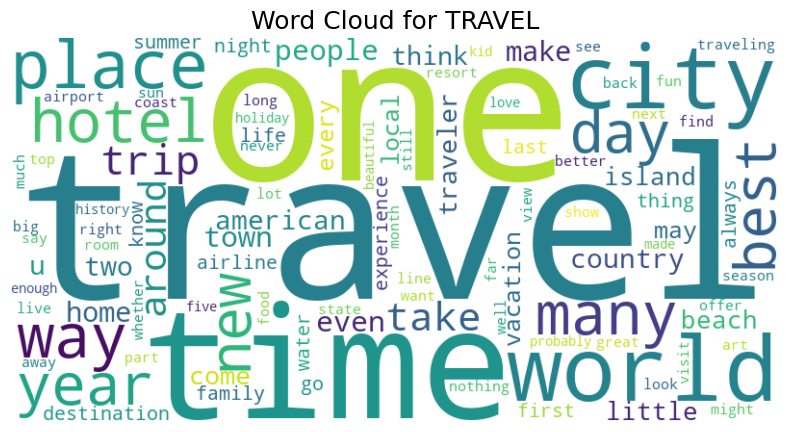

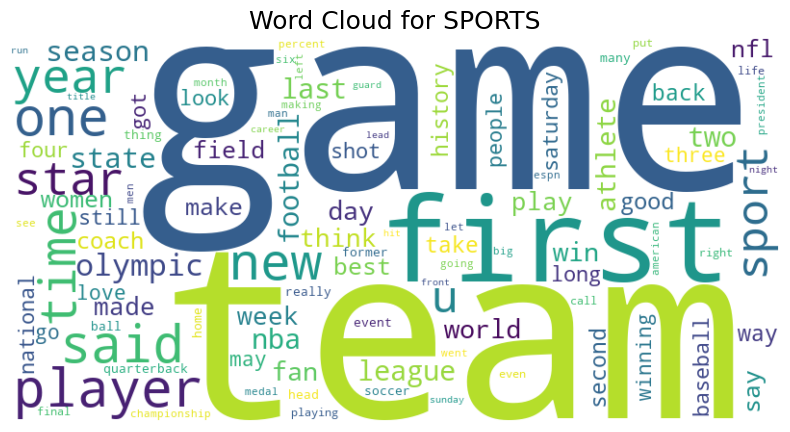

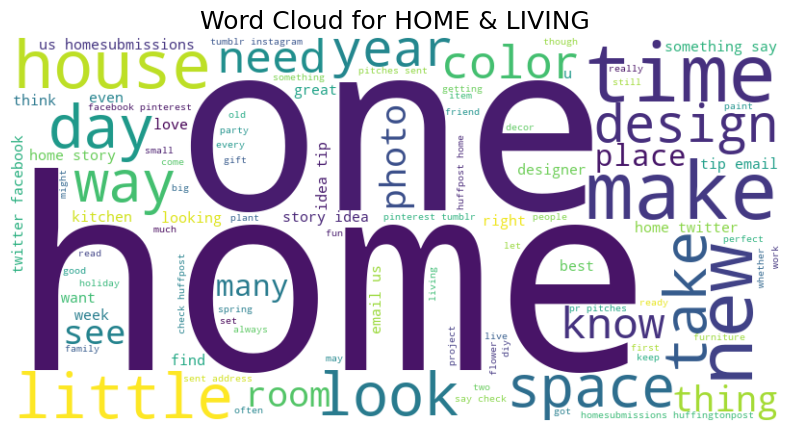

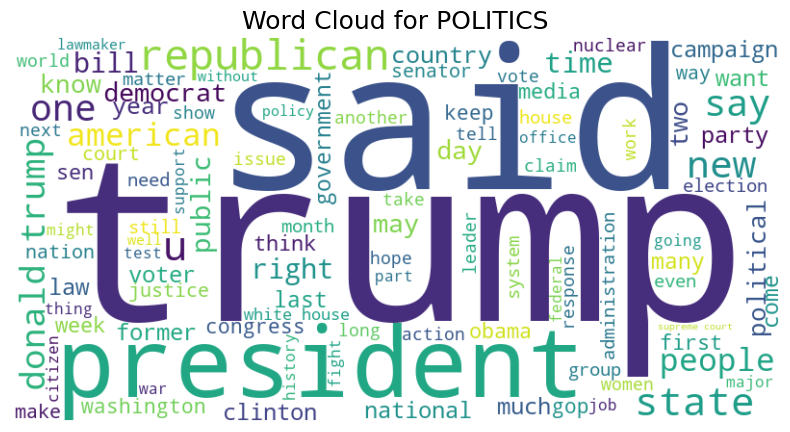

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


train_df = pd.DataFrame({'text': X_train, 'category': y_train})


for cat in train_df['category'].unique():
    text = " ".join(train_df[train_df['category'] == cat]['text'])
    

    wordcloud = WordCloud(width=800, height=400, 
                          background_color="white", 
                          max_words=100).generate(text)
    

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for {cat}", fontsize=18)
    plt.show()


# Classification Approach

In [51]:
df

,short_description,category
0,many people hectic shopping day year comes day...,HOME & LIVING
1,comedy special aziz ansari right debuts,HOME & LIVING
2,yep really,HOME & LIVING
3,got kidding us horse shaped lamp,HOME & LIVING
4,life expensive use talents help defer cost,HOME & LIVING
...,...,...
3995,leshan giant buddha china old chinese monk tho...,TRAVEL
3996,one many families getting ready get away summe...,TRAVEL
3997,,TRAVEL
3998,groups like girls love travel solo female trav...,TRAVEL


In [52]:
from collections import Counter

train_df = pd.DataFrame({'text': X_train, 'category': y_train})

category_freqs = {}
for cat in train_df['category'].unique():
    words = " ".join(train_df[train_df['category'] == cat]['text']).split()
    freq = Counter(words)
    category_freqs[cat] = [w for w, c in freq.most_common(100)]



In [53]:
category_freqs['SPORTS']


['game',
 'first',
 'team',
 'said',
 'one',
 'time',
 'football',
 'star',
 'new',
 'like',
 'players',
 'sports',
 'world',
 'nfl',
 'league',
 'back',
 'state',
 'last',
 'two',
 'season',
 'nba',
 'year',
 'player',
 'coach',
 'years',
 'made',
 'women',
 'best',
 'field',
 'win',
 'head',
 'good',
 'think',
 'could',
 'news',
 'u',
 'history',
 'athletes',
 'teams',
 'play',
 'week',
 'olympic',
 'long',
 'people',
 'got',
 'baseball',
 'way',
 'olympics',
 'us',
 'take',
 'still',
 'four',
 'saturday',
 'second',
 'may',
 'night',
 'winning',
 'go',
 'fans',
 'national',
 'make',
 'ncaa',
 'would',
 'quarterback',
 'many',
 'love',
 'home',
 'day',
 'ball',
 'shot',
 'three',
 'former',
 'get',
 'high',
 'soccer',
 'really',
 'playing',
 'even',
 'put',
 'series',
 'games',
 'look',
 'old',
 'say',
 'life',
 'san',
 'espn',
 'making',
 'let',
 'right',
 'event',
 'president',
 'also',
 'went',
 'final',
 'percent',
 'big',
 'men',
 'usa',
 'six']

In [54]:
category_freqs['HOME & LIVING']

['home',
 'one',
 'us',
 'new',
 'check',
 'time',
 'like',
 'say',
 'make',
 'house',
 'get',
 'something',
 'little',
 'day',
 'room',
 'take',
 'see',
 'idea',
 'sure',
 'look',
 'great',
 'com',
 'know',
 'need',
 'space',
 'design',
 'tip',
 'pinterest',
 'many',
 'story',
 'color',
 'way',
 'best',
 'even',
 'email',
 'facebook',
 'right',
 'think',
 'looking',
 'homesubmissions',
 'sent',
 'address',
 'twitter',
 'want',
 'huffpost',
 'huffingtonpost',
 'pr',
 'pitches',
 'kitchen',
 'love',
 'homes',
 'much',
 'read',
 'designer',
 'year',
 'place',
 'furniture',
 'every',
 'really',
 'things',
 'small',
 'big',
 'tumblr',
 'instagram',
 'decor',
 'slideshow',
 'week',
 'easy',
 'holiday',
 'people',
 'find',
 'old',
 'photos',
 'paint',
 'getting',
 'always',
 'diy',
 'might',
 'would',
 'around',
 'interior',
 'spring',
 'last',
 'living',
 'made',
 'family',
 'real',
 'craft',
 'two',
 'though',
 'may',
 'let',
 'party',
 'go',
 'perfect',
 'fun',
 'first',
 'without',
 'liv

In [55]:
category_freqs['POLITICS']

['trump',
 'president',
 'said',
 'new',
 'donald',
 'one',
 'would',
 'state',
 'u',
 'republican',
 'people',
 'like',
 'obama',
 'says',
 'political',
 'clinton',
 'time',
 'public',
 'bill',
 'may',
 'former',
 'two',
 'party',
 'day',
 'news',
 'house',
 'republicans',
 'also',
 'white',
 'country',
 'court',
 'states',
 'first',
 'much',
 'congress',
 'justice',
 'american',
 'rights',
 'national',
 'many',
 'could',
 'last',
 'say',
 'media',
 'health',
 'us',
 'know',
 'presidential',
 'think',
 'campaign',
 'washington',
 'right',
 'week',
 'help',
 'gop',
 'government',
 'sen',
 'way',
 'democratic',
 'senator',
 'democrats',
 'americans',
 'wants',
 'violence',
 'huffpost',
 'even',
 'still',
 'security',
 'administration',
 'voters',
 'hillary',
 'short',
 'change',
 'months',
 'year',
 'law',
 'keep',
 'next',
 'another',
 'sign',
 'department',
 'long',
 'care',
 'get',
 'women',
 'nuclear',
 'need',
 'comes',
 'support',
 'since',
 'response',
 'brown',
 'might',
 'histo

In [56]:
category_freqs['TRAVEL']

['travel',
 'one',
 'world',
 'city',
 'time',
 'new',
 'get',
 'like',
 'many',
 'best',
 'around',
 'trip',
 'country',
 'way',
 'people',
 'place',
 'even',
 'take',
 'year',
 'day',
 'two',
 'think',
 'beach',
 'town',
 'little',
 'may',
 'every',
 'hotel',
 'first',
 'always',
 'make',
 'us',
 'american',
 'summer',
 'home',
 'places',
 'life',
 'know',
 'vacation',
 'go',
 'last',
 'family',
 'ever',
 'traveling',
 'find',
 'still',
 'much',
 'better',
 'long',
 'great',
 'night',
 'well',
 'road',
 'hotels',
 'whether',
 'would',
 'back',
 'years',
 'away',
 'coast',
 'see',
 'big',
 'lot',
 'food',
 'also',
 'water',
 'travelers',
 'want',
 'fun',
 'across',
 'might',
 'right',
 'visit',
 'list',
 'top',
 'never',
 'island',
 'local',
 'comes',
 'things',
 'far',
 'nothing',
 'sun',
 'next',
 'art',
 'probably',
 'beautiful',
 'season',
 'history',
 'enough',
 'five',
 'could',
 'part',
 'made',
 'found',
 'look',
 'often',
 'ways',
 'experience',
 'traveler']

In [ ]:
fallback_cat = y_train.value_counts().idxmax()

def classify_with_topN(text, N):
    tokens = text.split()
    if not tokens:
        return fallback_cat
    scores = {}
    for cat, word_list in category_freqs.items():
        topN = set(word_list[:N])
        scores[cat] = sum(1 for t in tokens if t in topN)
    max_score = max(scores.values())
    # tie or zero overlap -> fallback
    if list(scores.values()).count(max_score) > 1 or max_score == 0:
        return fallback_cat
    return max(scores, key=scores.get)

# Start with top 10 frequent words per category.

In [76]:
from sklearn.metrics import accuracy_score, classification_report

# Predict
y_pred_10 = X_test.apply(lambda s: classify_with_topN(s, 10))

# Evaluate
print("=== Top 10 Frequent Words ===")
print("Accuracy:", accuracy_score(y_test, y_pred_10))
print(classification_report(y_test, y_pred_10, zero_division=0))


=== Top 10 Frequent Words ===
Accuracy: 0.38
               precision    recall  f1-score   support

HOME & LIVING       0.61      0.23      0.34       200
     POLITICS       0.89      0.28      0.42       200
       SPORTS       0.64      0.14      0.24       200
       TRAVEL       0.28      0.86      0.42       200

     accuracy                           0.38       800
    macro avg       0.61      0.38      0.35       800
 weighted avg       0.61      0.38      0.35       800



# Increase to 20, 30, 50… words and compare results.

In [77]:
# Predict
y_pred_20 = X_test.apply(lambda s: classify_with_topN(s, 20))

# Evaluate
print("=== Top 20 Frequent Words ===")
print("Accuracy:", accuracy_score(y_test, y_pred_20))
print(classification_report(y_test, y_pred_20, zero_division=0))


=== Top 20 Frequent Words ===
Accuracy: 0.40875
               precision    recall  f1-score   support

HOME & LIVING       0.60      0.30      0.40       200
     POLITICS       0.81      0.30      0.44       200
       SPORTS       0.63      0.21      0.32       200
       TRAVEL       0.29      0.82      0.43       200

     accuracy                           0.41       800
    macro avg       0.58      0.41      0.40       800
 weighted avg       0.58      0.41      0.40       800



In [78]:
# Predict
y_pred_30 = X_test.apply(lambda s: classify_with_topN(s, 30))

# Evaluate
print("=== Top 30 Frequent Words ===")
print("Accuracy:", accuracy_score(y_test, y_pred_30))
print(classification_report(y_test, y_pred_30, zero_division=0))


=== Top 30 Frequent Words ===
Accuracy: 0.42375
               precision    recall  f1-score   support

HOME & LIVING       0.62      0.32      0.42       200
     POLITICS       0.87      0.36      0.51       200
       SPORTS       0.61      0.21      0.32       200
       TRAVEL       0.29      0.80      0.43       200

     accuracy                           0.42       800
    macro avg       0.60      0.42      0.42       800
 weighted avg       0.60      0.42      0.42       800



In [79]:
# Predict
y_pred_50 = X_test.apply(lambda s: classify_with_topN(s, 50))

# Evaluate
print("=== Top 50 Frequent Words ===")
print("Accuracy:", accuracy_score(y_test, y_pred_50))
print(classification_report(y_test, y_pred_50, zero_division=0))


=== Top 50 Frequent Words ===
Accuracy: 0.42625
               precision    recall  f1-score   support

HOME & LIVING       0.68      0.25      0.36       200
     POLITICS       0.82      0.38      0.51       200
       SPORTS       0.57      0.26      0.36       200
       TRAVEL       0.30      0.82      0.44       200

     accuracy                           0.43       800
    macro avg       0.59      0.43      0.42       800
 weighted avg       0.59      0.43      0.42       800



In [90]:
results = []

for N in [10, 20, 30, 50]:

    y_pred = X_test.apply(lambda s: classify_with_topN(s, N))
    

    acc = accuracy_score(y_test, y_pred)
    

    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    

    results.append({
        "Top Words": N,
        "Accuracy": acc,
        "Precision (macro avg)": report['macro avg']['precision'],
        "Recall (macro avg)": report['macro avg']['recall'],
        "F1-score (macro avg)": report['macro avg']['f1-score']
    })

results_df = pd.DataFrame(results)
print("\nSummary Table (Performance Metrics):")
print(results_df)



Summary Table (Performance Metrics):
   Top Words  Accuracy  Precision (macro avg)  Recall (macro avg)  \
0         10   0.38000               0.605694             0.38000   
1         20   0.40875               0.584268             0.40875   
2         30   0.42375               0.597950             0.42375   
3         50   0.42625               0.589673             0.42625   

   F1-score (macro avg)  
0              0.354988  
1              0.397892  
2              0.419773  
3              0.419219  


# Plot accuracy vs. number of frequent words.

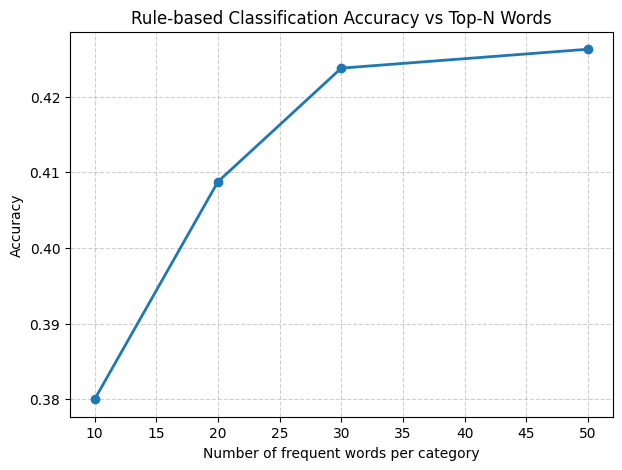

In [83]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.plot(results_df["Top Words"], results_df["Accuracy"], marker="o", linewidth=2)
plt.xlabel("Number of frequent words per category")
plt.ylabel("Accuracy")
plt.title("Rule-based Classification Accuracy vs Top-N Words")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Analyze which categories are easier or harder to classify using only frequent words from short descriptions.

In [88]:
y_pred_50 = X_test.apply(lambda s: classify_with_topN(s, 50))

print("Per-category performance (Top 50 words)")
print(classification_report(y_test, y_pred_50, zero_division=0))


Per-category performance (Top 50 words)
               precision    recall  f1-score   support

HOME & LIVING       0.68      0.25      0.36       200
     POLITICS       0.82      0.38      0.51       200
       SPORTS       0.57      0.26      0.36       200
       TRAVEL       0.30      0.82      0.44       200

     accuracy                           0.43       800
    macro avg       0.59      0.43      0.42       800
 weighted avg       0.59      0.43      0.42       800

